# About DataSet mushroom_data.csv

# Loading Dataset

In [2]:
import pandas as pd
df_mushroom = pd.read_csv('mushroom_data.csv',header=None)
df_mushroom.head()

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


# Preparing Data

In [4]:
#Copy data set to new df and renaming it's columns
headings = {0:"class",1:"cap-shape",2:"cap-surface",3:"cap-color",4:"bruises",5:"odor",6:"gill-attachment",7:"gill-spacing",
            8:"gill-size",9:"gill-color",10:"stalk-shape",11:"stalk-root",12:"stalk-surface-above-ring",
            13:"stalk-surface-below-ring",14:"stalk-color-above-ring",15:"stalk-color-below-ring",16:"veil-type",
            17:"veil-color",18:"ring-number",19:"ring-type",20:"spore-print-color",21:"population",22:"habitat"}
df = df_mushroom.copy()
df.rename(columns=headings,inplace=True)
df.head() #Printing first 5 rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#Checking datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [8]:
#Checking unique values of dataset before encoding
for x in headings.values():
    print("%-30s: %8d"%(x,len(df[x].unique())))

class                         :        2
cap-shape                     :        6
cap-surface                   :        4
cap-color                     :       10
bruises                       :        2
odor                          :        9
gill-attachment               :        2
gill-spacing                  :        2
gill-size                     :        2
gill-color                    :       12
stalk-shape                   :        2
stalk-root                    :        5
stalk-surface-above-ring      :        4
stalk-surface-below-ring      :        4
stalk-color-above-ring        :        9
stalk-color-below-ring        :        9
veil-type                     :        1
veil-color                    :        4
ring-number                   :        3
ring-type                     :        5
spore-print-color             :        9
population                    :        6
habitat                       :        7


# Label Encodings

In [12]:
from sklearn.preprocessing import LabelEncoder
le = {}
encoded_values = {}
for i in headings.values():
    le[i] = LabelEncoder()
    encoded_values[i] = le[i].fit_transform(df[i])
    print(f"%-30s: {le[i].classes_}"%(i))

class                         : ['e' 'p']
cap-shape                     : ['b' 'c' 'f' 'k' 's' 'x']
cap-surface                   : ['f' 'g' 's' 'y']
cap-color                     : ['b' 'c' 'e' 'g' 'n' 'p' 'r' 'u' 'w' 'y']
bruises                       : ['f' 't']
odor                          : ['a' 'c' 'f' 'l' 'm' 'n' 'p' 's' 'y']
gill-attachment               : ['a' 'f']
gill-spacing                  : ['c' 'w']
gill-size                     : ['b' 'n']
gill-color                    : ['b' 'e' 'g' 'h' 'k' 'n' 'o' 'p' 'r' 'u' 'w' 'y']
stalk-shape                   : ['e' 't']
stalk-root                    : ['?' 'b' 'c' 'e' 'r']
stalk-surface-above-ring      : ['f' 'k' 's' 'y']
stalk-surface-below-ring      : ['f' 'k' 's' 'y']
stalk-color-above-ring        : ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
stalk-color-below-ring        : ['b' 'c' 'e' 'g' 'n' 'o' 'p' 'w' 'y']
veil-type                     : ['p']
veil-color                    : ['n' 'o' 'w' 'y']
ring-number                   : 

In [13]:
#Replacing the actual values of columns with encoded values
for x in headings.values():
    df[x] = encoded_values[x]
    
#Printing first 5 rows of encoded dataset
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [14]:
#Statistical Summary of Dataset
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.0,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.482029,3.348104,1.827671,4.504677,0.415559,4.144756,0.974151,0.161497,0.309207,4.810684,...,1.603644,5.816347,5.794682,0.0,1.965534,1.069424,2.291974,3.596750,3.644018,1.508616
std,0.499708,1.604329,1.229873,2.545821,0.492848,2.103729,0.158695,0.368011,0.462195,3.540359,...,0.675974,1.901747,1.907291,0.0,0.242669,0.271064,1.801672,2.382663,1.252082,1.719975
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,2.000000,1.000000,0.000000,0.000000,2.000000,...,1.000000,6.000000,6.000000,0.0,2.000000,1.000000,0.000000,2.000000,3.000000,0.000000
50%,0.000000,3.000000,2.000000,4.000000,0.000000,5.000000,1.000000,0.000000,0.000000,5.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,2.000000,3.000000,4.000000,1.000000
75%,1.000000,5.000000,3.000000,8.000000,1.000000,5.000000,1.000000,0.000000,1.000000,7.000000,...,2.000000,7.000000,7.000000,0.0,2.000000,1.000000,4.000000,7.000000,4.000000,2.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,8.000000,1.000000,1.000000,1.000000,11.000000,...,3.000000,8.000000,8.000000,0.0,3.000000,2.000000,4.000000,8.000000,5.000000,6.000000


# Exploratory Data Analysis (EDA)

# Univariate Analysis

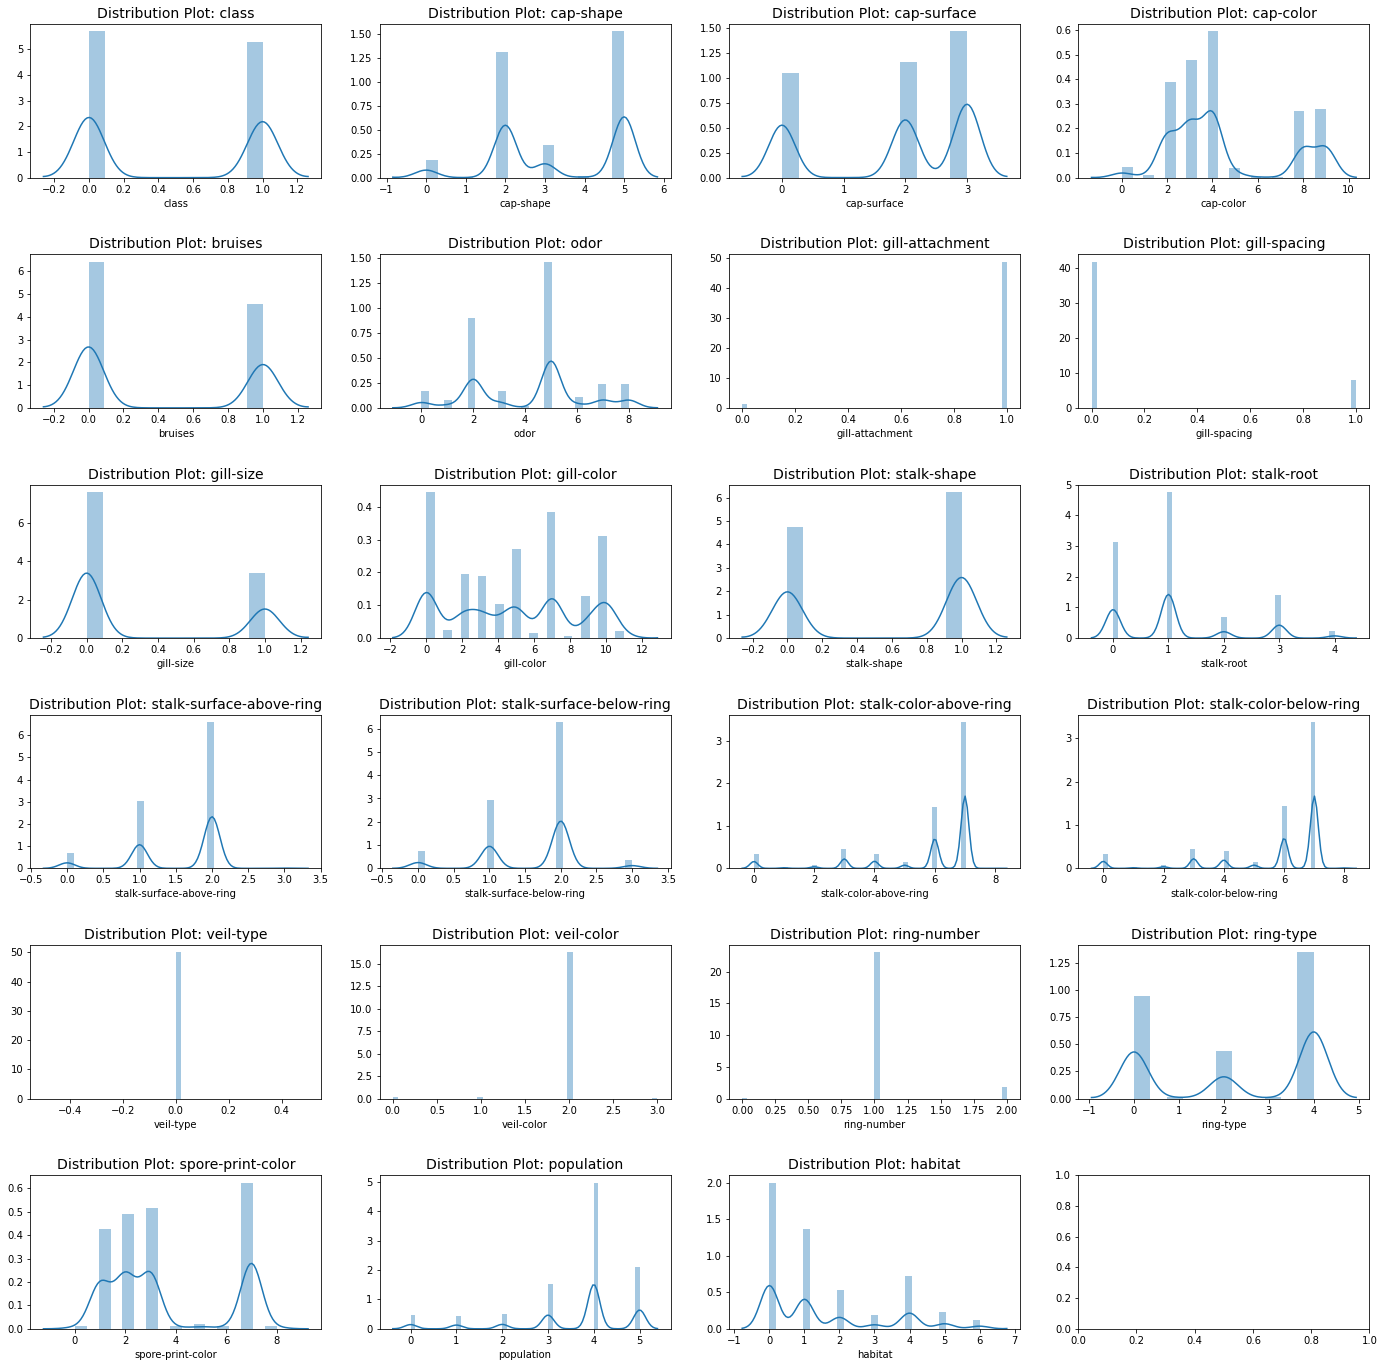

In [83]:
import warnings
warnings.simplefilter('ignore')

#Checking data distribution using distplot.
cols = 4
rows = 6
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols,rows*cols))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.distplot(df[df.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df.columns[k]}", fontsize=14)
        k += 1
        if k == 23:
            break;
            
plt.show()

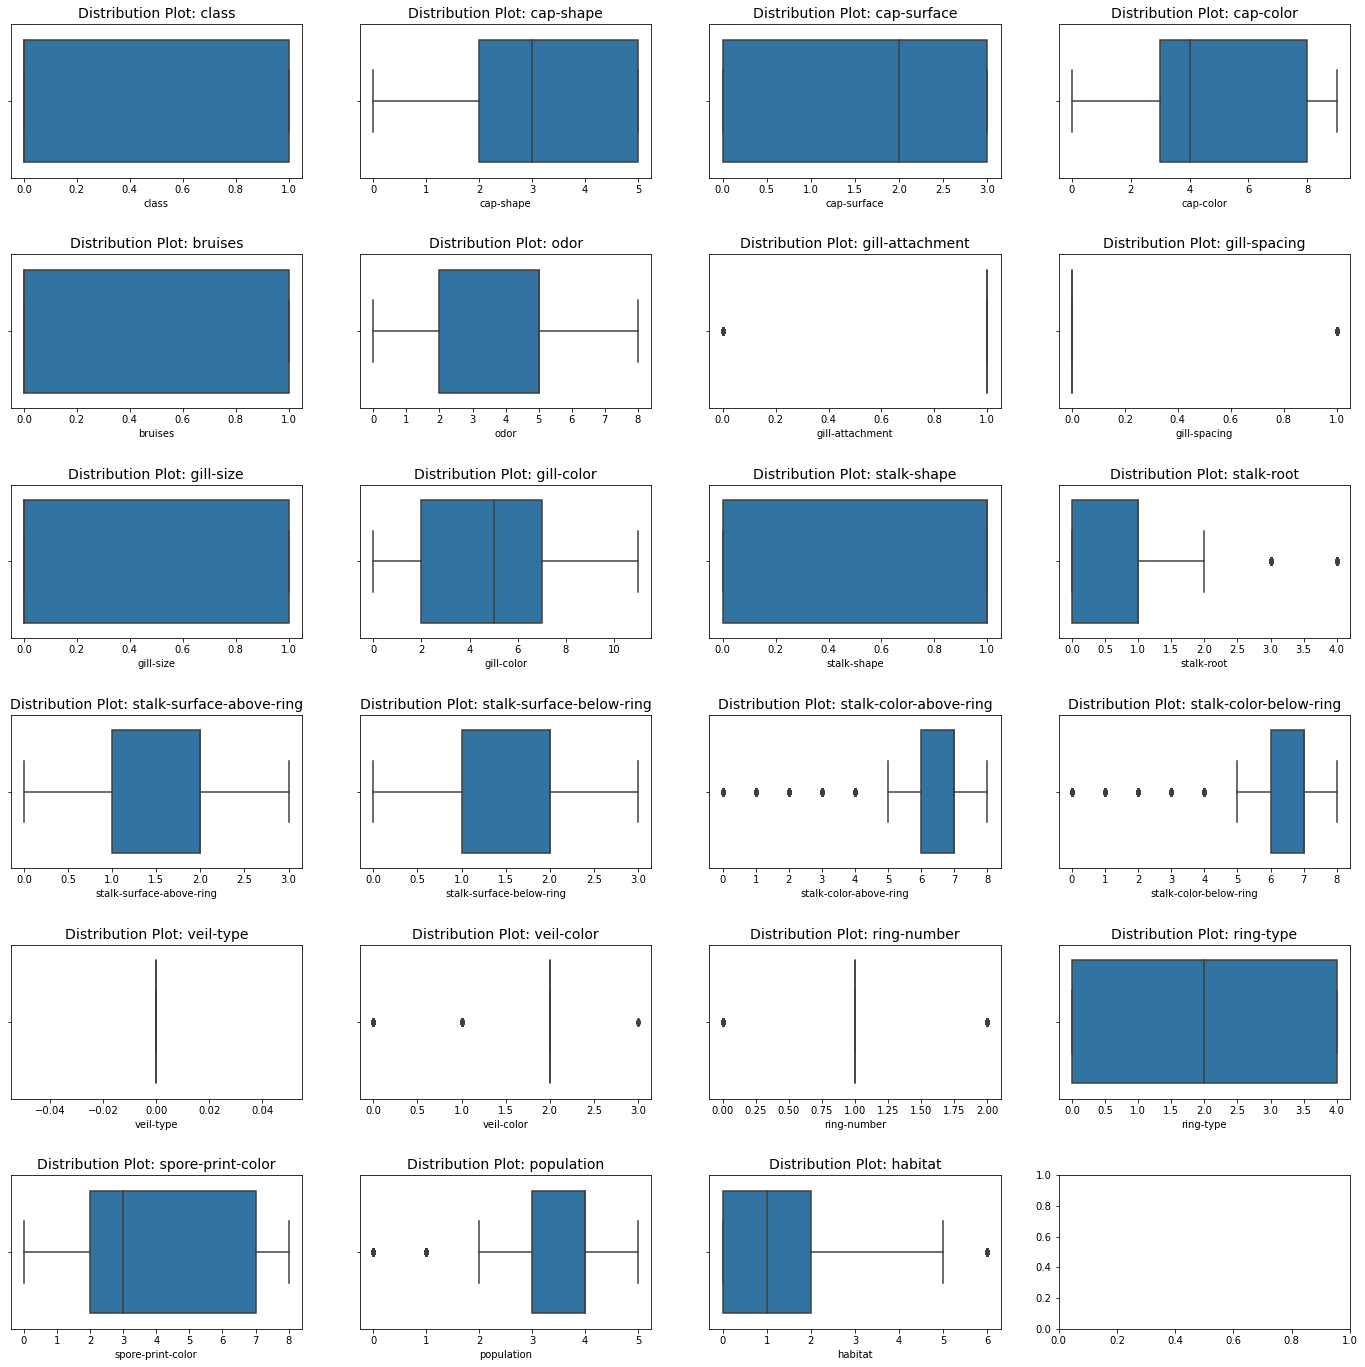

In [84]:
#Checking data with Box-Plot.
cols = 4
rows = 6
fig, axes = plt.subplots(rows,cols,figsize=(rows*cols,rows*cols))
plt.subplots_adjust(hspace=0.5)
k=0
for i in range(rows):
    for j in range(cols):
        sns.boxplot(df[df.columns[k]],ax=axes[i][j])
        axes[i][j].set_title(f"Distribution Plot: {df.columns[k]}", fontsize=14)
        k += 1
        if k == 23:
            break;
            
plt.show()

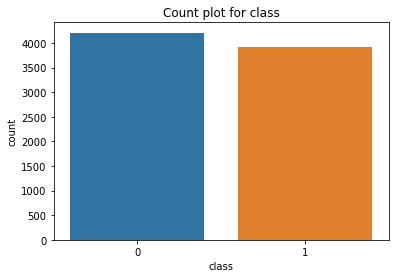

In [17]:
#Checking feature class with countplot
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(df['class'])
plt.title('Count plot for class')
plt.show()

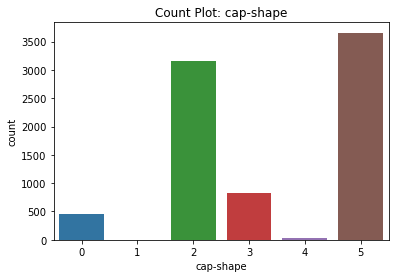

In [18]:
#Checking feature cap-shape with countplot
sns.countplot(df['cap-shape'])
plt.title("Count Plot: cap-shape")
plt.show()

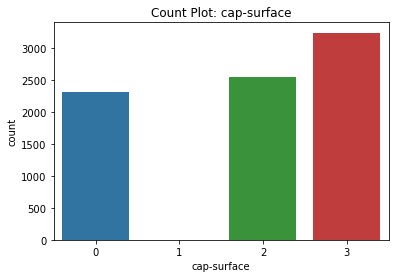

In [19]:
#Checking feature cap-surface with countplot
x='cap-surface'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

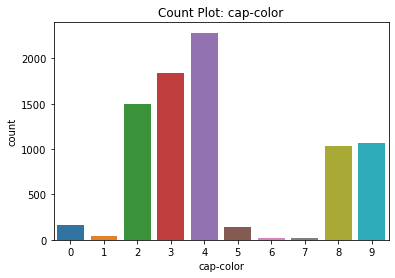

In [21]:
#Checking feature cap-color with countplot
x='cap-color'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

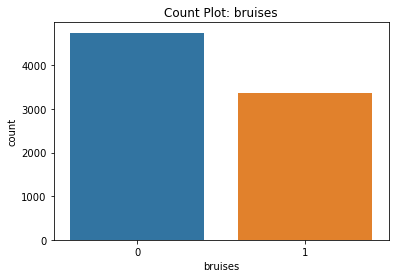

In [23]:
#Checking feature bruises with countplot
x='bruises'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

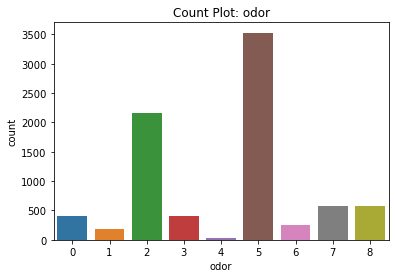

In [24]:
#Checking feature odor with countplot
x='odor'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

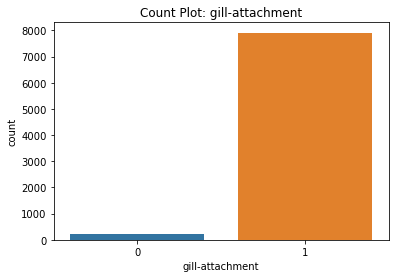

In [26]:
#Checking feature gill-attachment with countplot
x='gill-attachment'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

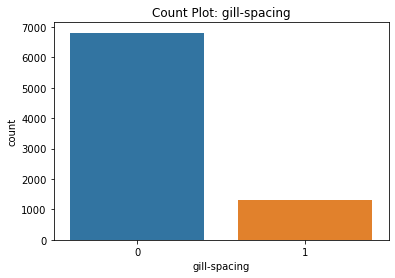

In [27]:
#Checking feature gill-spacing with countplot
x='gill-spacing'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

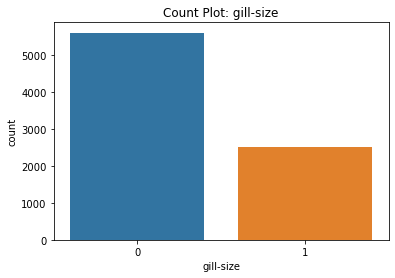

In [28]:
#Checking feature gill-size with countplot
x='gill-size'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

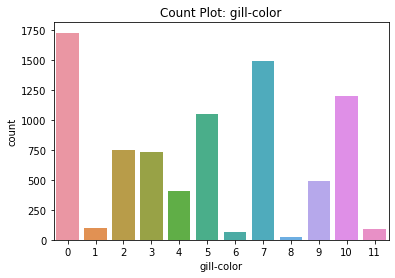

In [29]:
#Checking feature gill-color with countplot
x='gill-color'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

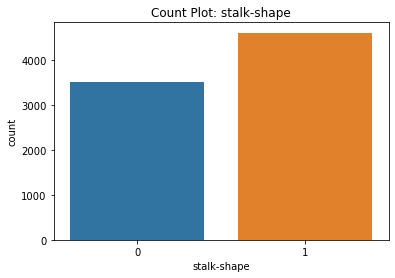

In [30]:
#Checking feature stalk-shape with countplot
x='stalk-shape'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

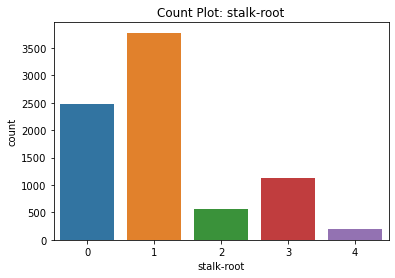

In [31]:
#Checking feature stalk-root with countplot
x='stalk-root'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

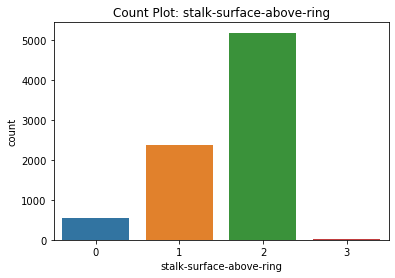

In [32]:
#Checking feature stalk-surface-above-ring with countplot
x='stalk-surface-above-ring'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

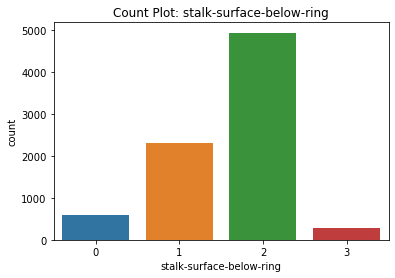

In [33]:
#Checking feature stalk-surface-below-ring with countplot
x='stalk-surface-below-ring'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

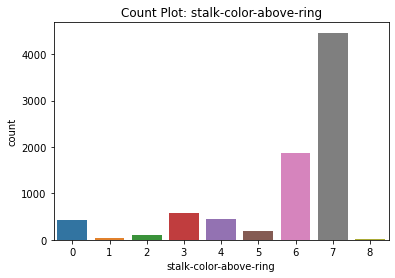

In [34]:
#Checking feature stalk-color-above-ring with countplot
x='stalk-color-above-ring'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

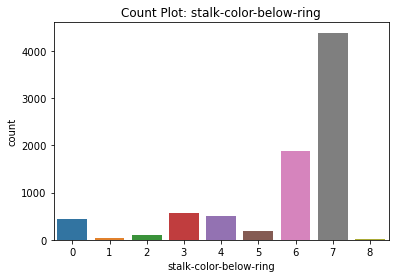

In [35]:
#Checking feature stalk-color-below-ring with countplot
x='stalk-color-below-ring'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

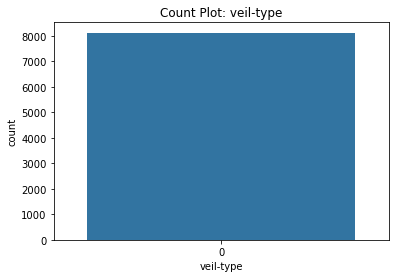

In [36]:
#Checking feature veil-type with countplot
x='veil-type'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

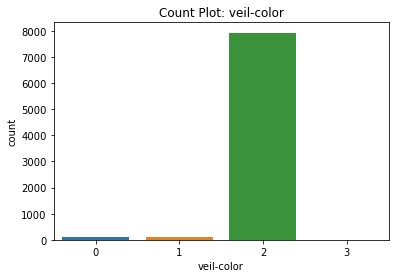

In [37]:
#Checking feature veil-color with countplot
x='veil-color'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

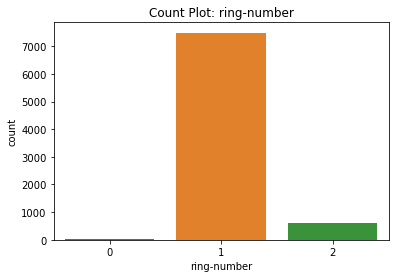

In [38]:
#Checking feature ring-number with countplot
x='ring-number'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

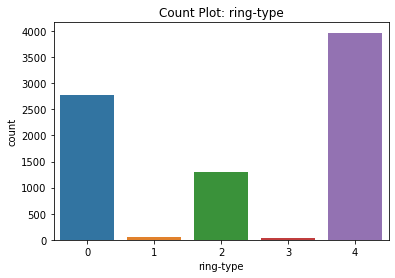

In [39]:
#Checking feature ring-type with countplot
x='ring-type'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

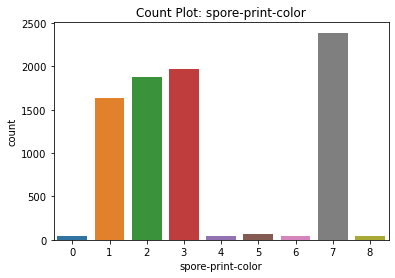

In [40]:
#Checking feature spore-print-color with countplot
x='spore-print-color'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

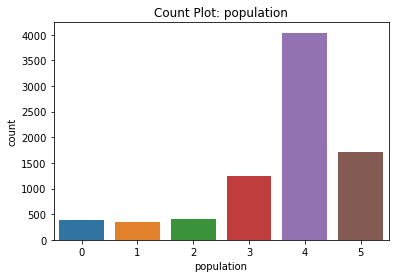

In [41]:
#Checking feature population with countplot
x='population'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

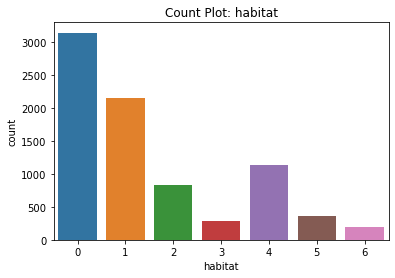

In [42]:
#Checking feature habitat with countplot
x='habitat'
sns.countplot(df[x])
plt.title(f"Count Plot: {x}")
plt.show()

# Bi-Variate Analysis

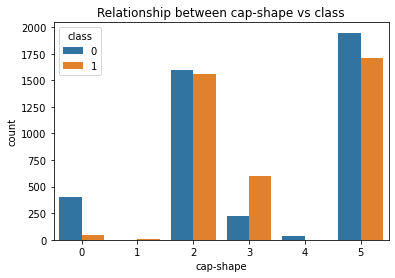

In [45]:
#Checking Relationship between cap-shape and class
f='cap-shape'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

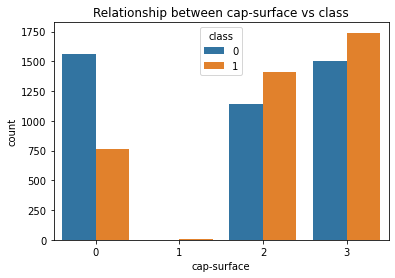

In [46]:
#Checking Relationship between cap-surface and class
f='cap-surface'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

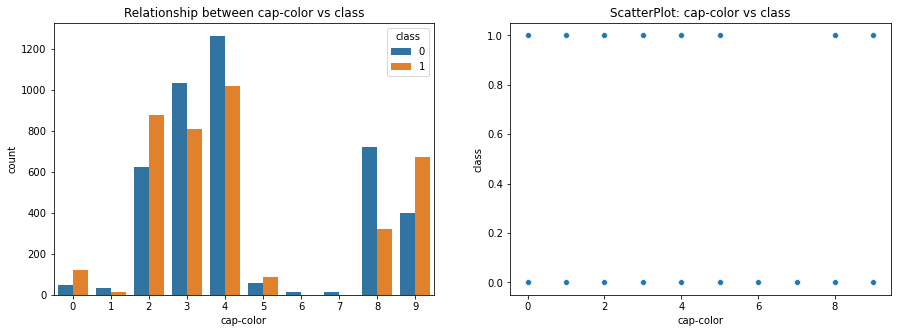

In [53]:
#Checking Relationship between cap-color and class
f='cap-color'
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(15,5))
sns.countplot(x=f,hue='class',data=df,ax=ax1)
ax1.set_title(f"Relationship between {f} vs class")

sns.scatterplot(x=f,y='class',data=df,ax=ax2)
ax2.set_title(f"ScatterPlot: {f} vs class")
plt.show()

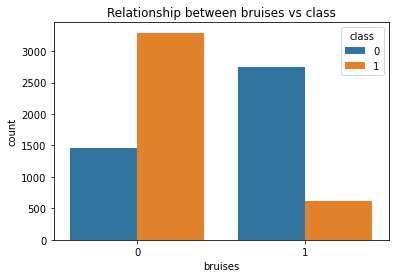

In [55]:
#Checking Relationship between bruises and class
f='bruises'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

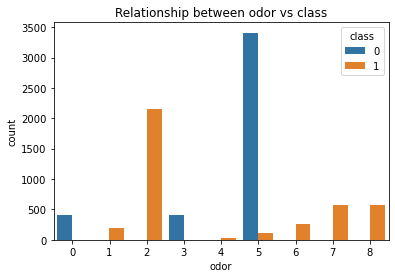

In [60]:
#Checking Relationship between odor and class
f='odor'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

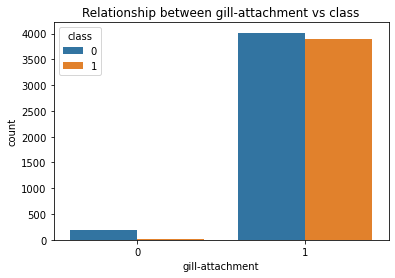

In [61]:
#Checking Relationship between gill-attachment and class
f='gill-attachment'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

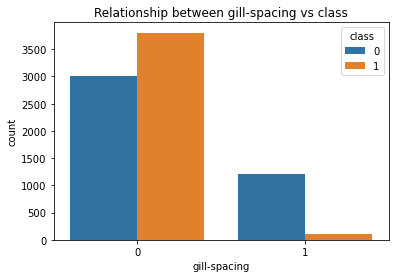

In [62]:
#Checking Relationship between gill-spacing and class
f='gill-spacing'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

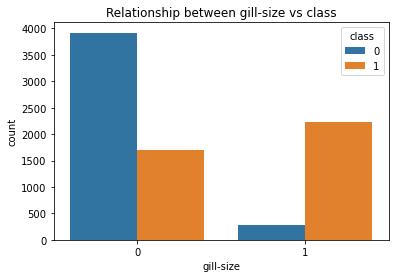

In [63]:
#Checking Relationship between gill-size and class
f='gill-size'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

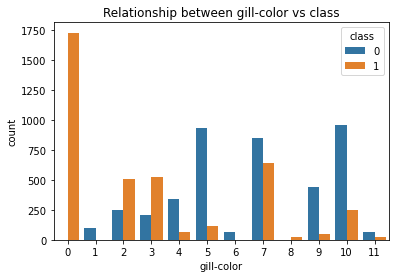

In [64]:
#Checking Relationship between gill-color and class
f='gill-color'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

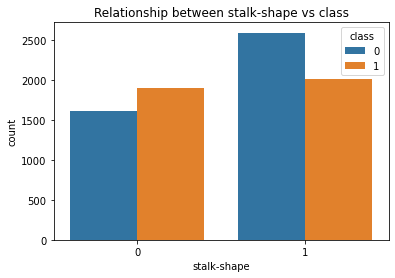

In [65]:
#Checking Relationship between stalk-shape and class
f='stalk-shape'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

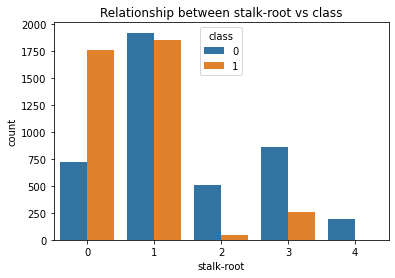

In [67]:
#Checking Relationship between stalk-root and class
f='stalk-root'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

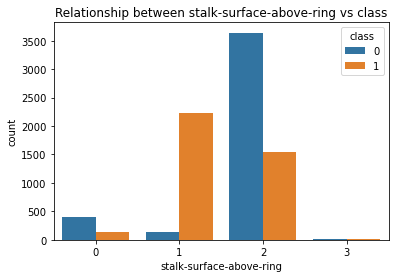

In [68]:
#Checking Relationship between stalk-surface-above-ring and class
f='stalk-surface-above-ring'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

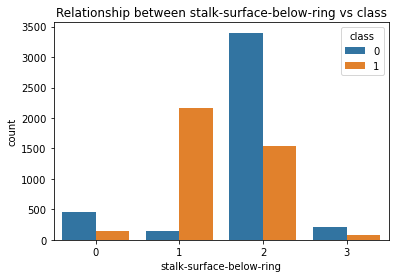

In [69]:
#Checking Relationship between stalk-surface-below-ring and class
f='stalk-surface-below-ring'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

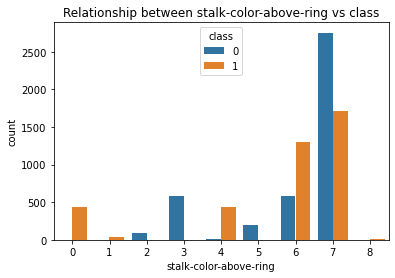

In [70]:
#Checking Relationship between stalk-color-above-ring and class
f='stalk-color-above-ring'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

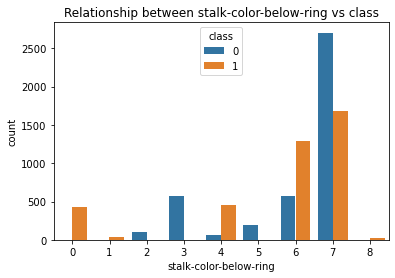

In [71]:
#Checking Relationship between stalk-color-below-ring and class
f='stalk-color-below-ring'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

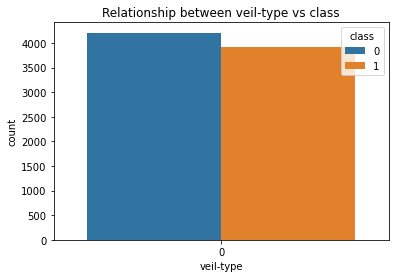

In [72]:
#Checking Relationship between veil-type and class
f='veil-type'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

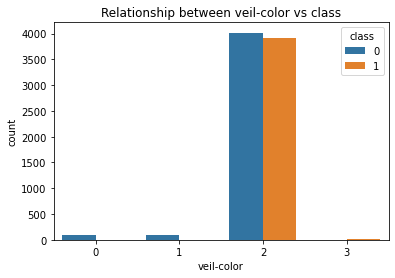

In [73]:
#Checking Relationship between veil-color and class
f='veil-color'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

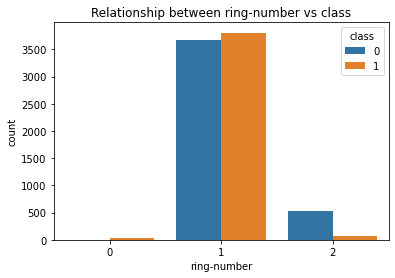

In [74]:
#Checking Relationship between ring-number and class
f='ring-number'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

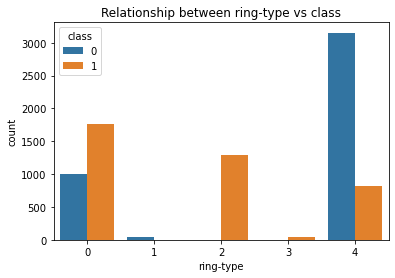

In [75]:
#Checking Relationship between ring-type and class
f='ring-type'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

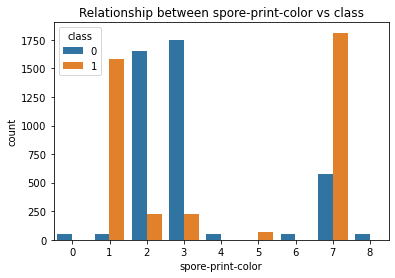

In [76]:
#Checking Relationship between spore-print-color and class
f='spore-print-color'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

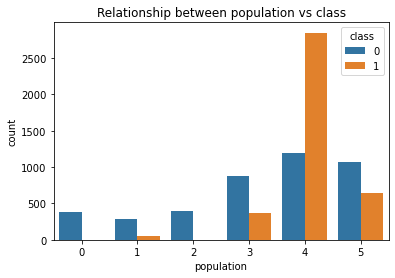

In [77]:
#Checking Relationship between population and class
f='population'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

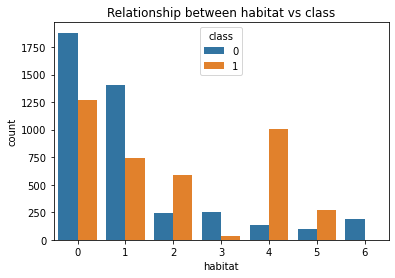

In [78]:
#Checking Relationship between habitat and class
f='habitat'
sns.countplot(x=f,hue='class',data=df)
plt.title(f"Relationship between {f} vs class")
plt.show()

# Multi-Variate Analysis

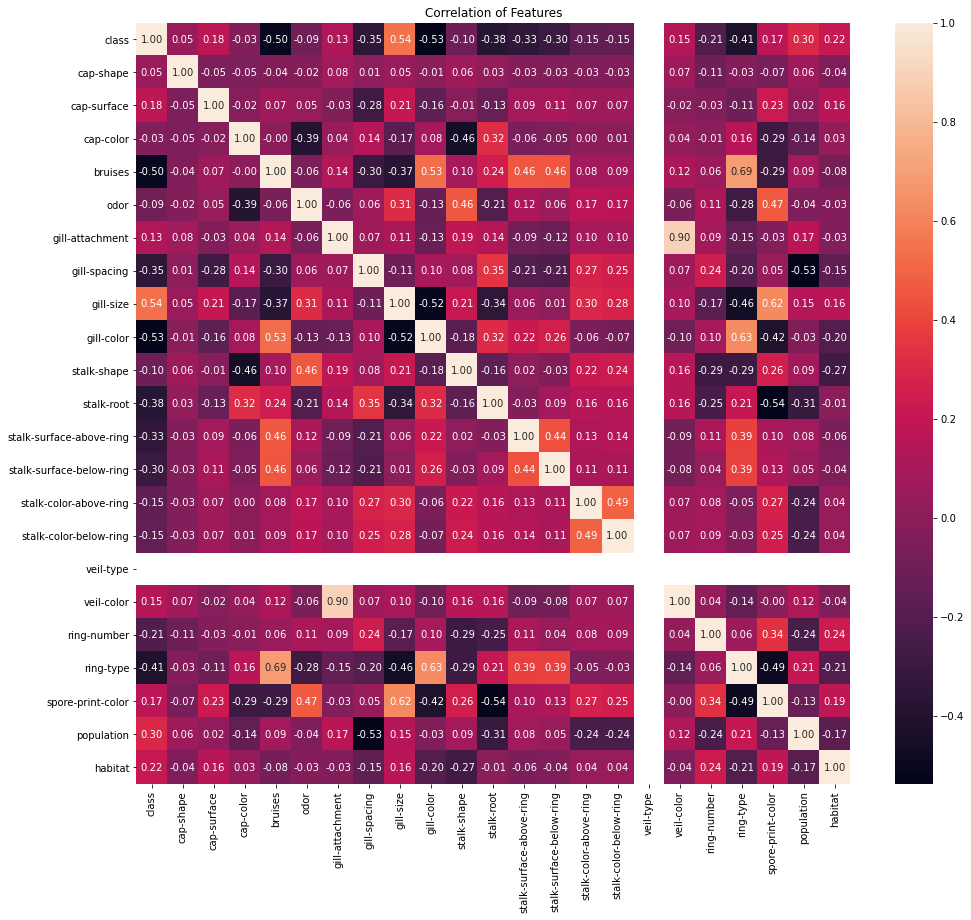

In [90]:
#Checking correlation of feature
df_corr = df.corr()

#Displaying correlation with the help of heatmap
plt.figure(figsize=(16,14))
sns.heatmap(df_corr,annot=True,fmt='.2f')
plt.title('Correlation of Features')
plt.show()

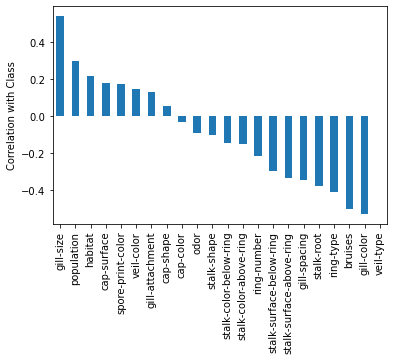

In [92]:
#Ploting correlation with features with bar plot
df_corr['class'].sort_values(ascending=False).drop(['class']).plot.bar()
plt.ylabel('Correlation with Class')
plt.show()

In [93]:
#Dropping veil-type from dataset
df.drop(columns=['veil-type'],inplace=True)
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type',
       'spore-print-color', 'population', 'habitat'],
      dtype='object')

# Removing Outliers

In [94]:
from scipy.stats import zscore
import numpy as np
z = np.abs(zscore(df))
#Printing location of outliers
np.where(z>3)

(array([1816, 2128, 2128, ..., 8121, 8123, 8123], dtype=int64),
 array([15, 14, 15, ..., 16,  6, 16], dtype=int64))

In [95]:
#Removing outliers
df_wo = df[(z<=3).all(axis=1)]
print(f"Original Shape: {df.shape}")
print(f"New Shape: {df_wo.shape}")
print(f"% Loss: {(len(df)-len(df_wo))*100/len(df)}%")

Original Shape: (8124, 22)
New Shape: (6568, 22)
% Loss: 19.153126538650913%


# Skewness

In [96]:
#Checking skewness
df.skew()

class                       0.071946
cap-shape                  -0.247052
cap-surface                -0.590859
cap-color                   0.706965
bruises                     0.342750
odor                       -0.080790
gill-attachment            -5.977076
gill-spacing                1.840088
gill-size                   0.825797
gill-color                  0.061410
stalk-shape                -0.271345
stalk-root                  0.947852
stalk-surface-above-ring   -1.098739
stalk-surface-below-ring   -0.757703
stalk-color-above-ring     -1.835434
stalk-color-below-ring     -1.791593
veil-color                 -6.946944
ring-number                 2.701657
ring-type                  -0.290018
spore-print-color           0.548426
population                 -1.413096
habitat                     0.985548
dtype: float64

# Preparing Data for Model

In [130]:
#Seperating Input and Target data.
x = df.drop(columns=['class'])
y = df['class']

print(x.shape)
print(y.shape)

(8124, 21)
(8124,)


In [131]:
#Treating Skewness of data
from sklearn.preprocessing import power_transform
x = power_transform(x)

In [132]:
#Scaling Data for model using Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)

# Finding Best Model

In [133]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [134]:
#Defining function for best random_state
def get_best_random_state(r,model,x,y,test_size=0.25):
    best_rState = 0
    best_aScore = 0
    for i in range(r):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=i)
        model.fit(x_train,y_train)
        predict_y = model.predict(x_test)
        temp_aScore = accuracy_score(y_test,predict_y)
        if temp_aScore>best_aScore:
            best_aScore = temp_aScore
            best_rState = i
            
    return best_rState, best_aScore


#Defining function for best CV
def get_best_cv(model,parameters,x_train,y_train):
    best_cv = 0
    best_cvScore = 0
    for i in range(2,20):
        gscv = GridSearchCV(model,parameters)
        gscv.fit(x_train,y_train)
        temp_cvScore = cross_val_score(gscv.best_estimator_,x_train,y_train,cv=i).mean()
        if temp_cvScore>best_cvScore:
            best_cvScore = temp_cvScore
            best_cv = i
    
    return best_cv, best_cvScore


# 1. LogisticRegression

In [135]:
from sklearn.linear_model import LogisticRegression
#Finding best random_state for train test split
best_rState, best_aScore = get_best_random_state(500,LogisticRegression(),x,y)
print(f"Best random_state: {best_rState} with best accuracy_score: {best_aScore}")

Best random_state: 180 with best accuracy_score: 0.9620876415558838


In [136]:
#Spilting train test data with random_state = 180
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=180)

In [137]:
#Hypertuning Parameters
parameters = {
    "solver": ['sag','saga'],
    "penalty": ['l2'],
    "max_iter": [50,100,150]
}

#Finding best CV
best_cv, best_cvScore = get_best_cv(LogisticRegression(),parameters,x_train,y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {best_cvScore}")

Best CV: 2 with best cross_val_score: 0.9502699661960432


In [138]:
#Builing Final LogisticRegression Model with Hypertuned Parameters
gscv_Lr = GridSearchCV(LogisticRegression(),parameters,cv=2)
gscv_Lr.fit(x_train,y_train)
print(gscv_Lr.best_params_)

{'max_iter': 150, 'penalty': 'l2', 'solver': 'saga'}


In [139]:
#Checking Final Performace of Model
gscv_Lr_predict_y = gscv_Lr.best_estimator_.predict(x_test)

gscv_Lr_aScore = accuracy_score(y_test,gscv_Lr_predict_y)
gscv_Lr_cMatrix = confusion_matrix(y_test,gscv_Lr_predict_y)
gscv_Lr_cReport = classification_report(y_test,gscv_Lr_predict_y)

print(f"Accuracy Score: {gscv_Lr_aScore}\n")
print(f"========Confusion Matrix=========\n{gscv_Lr_cMatrix}\n")
print(f"======Classification Report======\n{gscv_Lr_cReport}")

Accuracy Score: 0.9620876415558838

========Confusion Matrix=========
[[1021   36]
 [  41  933]]

======Classification Report======
              precision    recall  f1-score   support

           0       0.96      0.97      0.96      1057
           1       0.96      0.96      0.96       974

    accuracy                           0.96      2031
   macro avg       0.96      0.96      0.96      2031
weighted avg       0.96      0.96      0.96      2031



# 2. GaussianNB

In [140]:
from sklearn.naive_bayes import GaussianNB
#Finding the best random_state for train test split
best_rState, best_aScore = get_best_random_state(500,GaussianNB(),x,y)
print(f"Best random_state: {best_rState} with best accuracy_score: {best_aScore}")

Best random_state: 82 with best accuracy_score: 0.9453471196454948


In [141]:
#Splitting the train test data with random_state = 82
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=82)

In [142]:
#Hypertuning parameters
parameters = {
    "var_smoothing": [1e-10,1e-9,1e-8,1e-7]
}

#Finding best cv
best_cv, best_cvScore = get_best_cv(GaussianNB(),parameters,x_train,y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {best_cvScore}")

Best CV: 9 with best cross_val_score: 0.9328737895946168


In [143]:
#Building Final Model with hypertuned parameters
gscv_Gnb = GridSearchCV(GaussianNB(),parameters,cv=9)
gscv_Gnb.fit(x_train,y_train)
print(gscv_Gnb.best_params_)

{'var_smoothing': 1e-10}


In [144]:
#Checking Final Performance of the Model
gscv_Gnb_predict_y = gscv_Gnb.best_estimator_.predict(x_test)

gscv_Gnb_aScore = accuracy_score(y_test,gscv_Gnb_predict_y)
gscv_Gnb_cMatrix = confusion_matrix(y_test,gscv_Gnb_predict_y)
gscv_Gnb_cReport = classification_report(y_test,gscv_Gnb_predict_y)

print(f"Accuracy Score: {gscv_Gnb_aScore}\n")
print(f"========Confusion Matrix=======\n{gscv_Gnb_cMatrix}\n")
print(f"=====Classification Report=====\n{gscv_Gnb_cReport}")

Accuracy Score: 0.9453471196454948

========Confusion Matrix=======
[[1041   29]
 [  82  879]]

=====Classification Report=====
              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1070
           1       0.97      0.91      0.94       961

    accuracy                           0.95      2031
   macro avg       0.95      0.94      0.94      2031
weighted avg       0.95      0.95      0.95      2031



# 3. RandomForestClassifier

In [146]:
from sklearn.ensemble import RandomForestClassifier
#Finding best random_state for train test split
best_rState, best_aScore = get_best_random_state(500,RandomForestClassifier(),x,y)
print(f"Best random_state: {best_rState} with best accuracy_score: {best_aScore}")

Best random_state: 0 with best accuracy_score: 1.0


In [147]:
#Splitting train test data with random_state = 0
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [148]:
#Hypertuning Parameters
parameters = {
    "n_estimators": [50,100,150],
    "criterion": ['gini','entropy'],
    "max_features": ['auto','sqrt','log2'],
    "bootstrap": [True,False],
    "oob_score": [True,False],
}

#Finding best CV
best_cv, best_cvScore = get_best_cv(RandomForestClassifier(),parameters,x_train,y_train)
print(f"Best CV: {best_cv} with best cross_val_score: {best_cvScore}")

Best CV: 2 with best cross_val_score: 1.0


In [150]:
#Building Final Model with Hypertuned parameters
gscv_Rfc = GridSearchCV(RandomForestClassifier(),parameters,cv=2)
gscv_Rfc.fit(x_train,y_train)
print(gscv_Rfc.best_params_)

{'bootstrap': True, 'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 50, 'oob_score': True}


In [152]:
#Checking Final Performance of the Model
gscv_Rfc_predict_y = gscv_Rfc.best_estimator_.predict(x_test)

gscv_Rfc_aScore = accuracy_score(y_test,gscv_Rfc_predict_y)
gscv_Rfc_cMatrix = confusion_matrix(y_test,gscv_Rfc_predict_y)
gscv_Rfc_cReport = classification_report(y_test,gscv_Rfc_predict_y)

print(f"Accuracy Score: {gscv_Rfc_aScore}\n")
print(f"==========Confusion Matrix==========\n{gscv_Rfc_cMatrix}")
print(f"=======Classification Report========\n{gscv_Rfc_cReport}")

Accuracy Score: 1.0

==========Confusion Matrix==========
[[1061    0]
 [   0  970]]
=======Classification Report========
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1061
           1       1.00      1.00      1.00       970

    accuracy                           1.00      2031
   macro avg       1.00      1.00      1.00      2031
weighted avg       1.00      1.00      1.00      2031



# Selecting Best Model

In [153]:
model_names = ['LinearRegression','GaussianNB','RandomForestClassifier']
model_scores =[gscv_Lr_aScore,gscv_Gnb_aScore,gscv_Rfc_aScore]
#Comparing models
models = pd.DataFrame({"Name":model_names,"Accuracy":model_scores})
models

,Name,Accuracy
0,LinearRegression,0.962088
1,GaussianNB,0.945347
2,RandomForestClassifier,1.000000


# Model Saving or Serialization

In [154]:
import joblib
filename = "mushroom_project_model.pkl"
joblib.dump(gscv_Rfc.best_estimator_,open(filename,'wb'))

# Conclusion

In [156]:
cnc = pd.DataFrame({"Original":np.array(y_test),"Predicted":np.array(gscv_Rfc_predict_y)})
cnc

,Original,Predicted
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
2026,0,0
2027,1,1
2028,1,1
2029,0,0
